#### Importing Necesarry Libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

#### Dataset is loaded using pandas

In [73]:
data = pd.read_csv('dataset_traffic_accident_prediction1.csv')
data.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


#### Checking for missing values in the dataset

In [74]:
data.isnull().sum()

Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64

#### Checking the shape of dataset

In [75]:
data.shape

(840, 14)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


#### Selecting Numeric and Categorical Columns

In [77]:
numeric_columns = data.select_dtypes(include = ['float64']).columns
categorical_columns = data.select_dtypes(include = ['object']).columns

#### Handling Missing Values in the Numeric Columns with KNNImputer

In [78]:
imputer = KNNImputer(n_neighbors = 5)
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

#### Handling Missing Values in the Categorical Columns

In [79]:
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace = True)

In [80]:
data.isnull().sum()

Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               840 non-null    object 
 1   Road_Type             840 non-null    object 
 2   Time_of_Day           840 non-null    object 
 3   Traffic_Density       840 non-null    float64
 4   Speed_Limit           840 non-null    float64
 5   Number_of_Vehicles    840 non-null    float64
 6   Driver_Alcohol        840 non-null    float64
 7   Accident_Severity     840 non-null    object 
 8   Road_Condition        840 non-null    object 
 9   Vehicle_Type          840 non-null    object 
 10  Driver_Age            840 non-null    float64
 11  Driver_Experience     840 non-null    float64
 12  Road_Light_Condition  840 non-null    object 
 13  Accident              840 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


#### Converting Target values float to integer

In [82]:
data['Accident'] = data['Accident'].astype('int')
data.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,Low,Wet,Car,51.0,48.0,Artificial Light,0
1,Clear,Rural Road,Night,1.0,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1


#### Checking the Variables and Counts for all Columns

In [83]:
for col in data.columns:
    print(data[col].value_counts())

Weather
Clear     376
Rainy     230
Foggy     107
Snowy      87
Stormy     40
Name: count, dtype: int64
Road_Type
Highway          444
City Road        230
Rural Road       125
Mountain Road     41
Name: count, dtype: int64
Time_of_Day
Afternoon    314
Evening      218
Morning      201
Night        107
Name: count, dtype: int64
Traffic_Density
1.0    316
2.0    246
0.0    245
1.4      7
0.8      7
0.6      6
1.2      5
1.6      4
0.4      2
1.8      1
0.2      1
Name: count, dtype: int64
Speed_Limit
60.0     235
50.0     162
80.0     144
100.0    124
30.0      84
120.0     29
70.0       5
66.0       4
74.0       4
78.0       3
76.0       3
213.0      2
189.0      2
192.0      2
92.0       2
208.0      2
178.0      2
206.0      2
90.0       2
84.0       2
195.0      2
88.0       1
94.0       1
181.0      1
212.0      1
62.0       1
44.0       1
198.0      1
199.0      1
72.0       1
185.0      1
188.0      1
193.0      1
46.0       1
64.0       1
48.0       1
194.0      1
58.0       1
1

#### Accident Distribution by Weather Conditions (Countplot)

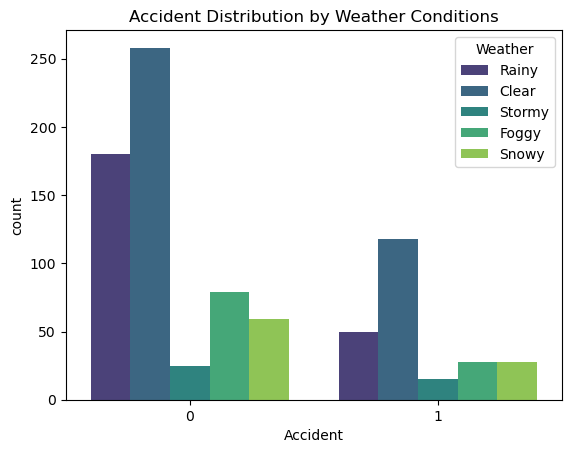

In [84]:
sns.countplot(data,
              x = 'Accident',
              hue = 'Weather',
              palette = 'viridis')
plt.title('Accident Distribution by Weather Conditions')
plt.show()

#### Accident Distribution by Road Types (Countplot)

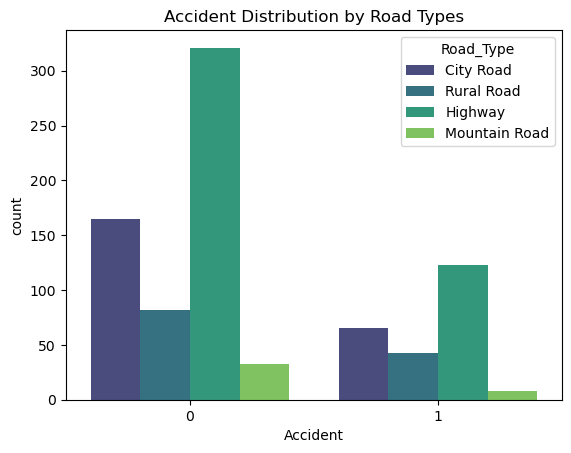

In [85]:
sns.countplot(data,
              x = 'Accident',
              hue = 'Road_Type',
              palette = 'viridis',
              )
plt.title('Accident Distribution by Road Types')
plt.show()

#### Accident Distribution by Time of Day (Countplot)

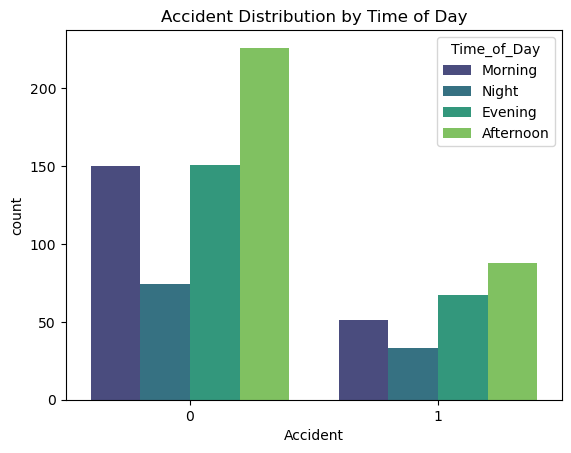

In [86]:
sns.countplot(data,
              x = 'Accident',
              hue = 'Time_of_Day',
              palette = 'viridis'
              )
plt.title('Accident Distribution by Time of Day')
plt.show()

#### Accident Distribution by Road Conditions (Countplot)

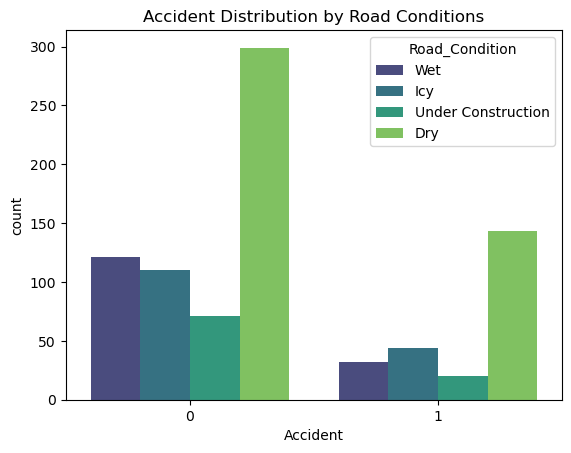

In [87]:
sns.countplot(data,
              x = 'Accident',
              hue = 'Road_Condition',
              palette = 'viridis')
plt.title('Accident Distribution by Road Conditions')
plt.show()

#### Accident Distribution by Vehicle Types (Countplot)

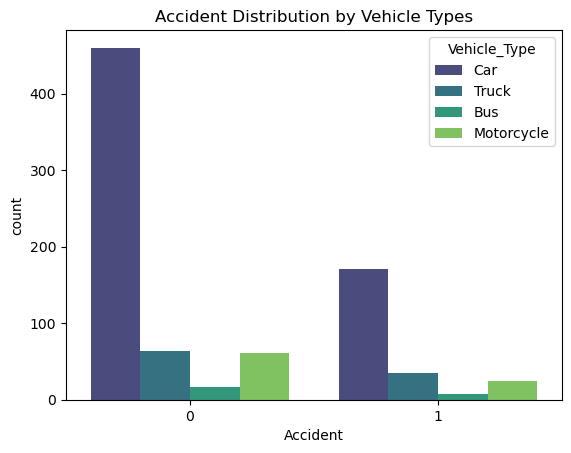

In [88]:
sns.countplot(data,
              x = 'Accident',
              hue = 'Vehicle_Type',
              palette = 'viridis')
plt.title('Accident Distribution by Vehicle Types')
plt.show()

#### Accident Severity Distribution (Pie Chart)

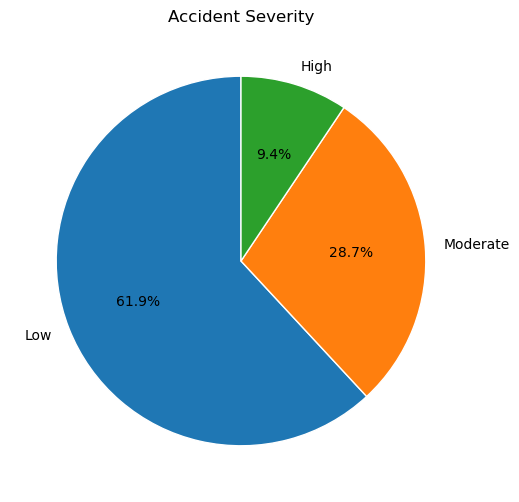

In [89]:
accident_severity = data['Accident_Severity'].value_counts()
transaction = accident_severity.index
sizes = accident_severity.values

plt.figure(figsize = (6,6))
plt.pie(sizes,
        labels = transaction,
        autopct = '%1.1f%%',
        startangle = 90,
        wedgeprops = {'edgecolor': 'white'}
        )
plt.title('Accident Severity')
plt.show()


#### Road Light Condition Distribution (Pie Chart)

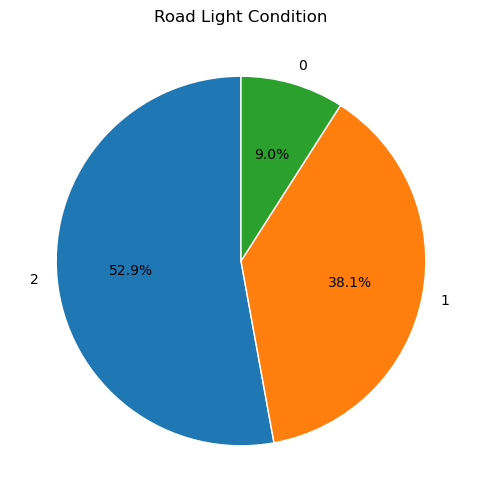

In [119]:
road_light_condition = data['Road_Light_Condition'].value_counts()
transaction = road_light_condition.index
sizes = road_light_condition.values

plt.figure(figsize = (6, 6))
plt.pie(sizes,
        labels = transaction,
        autopct = '%1.1f%%',
        startangle = 90,
        wedgeprops = {'edgecolor': 'white'})
plt.title('Road Light Condition')
plt.show()

#### Accident Distribution by Road Light Condition (Countplot)

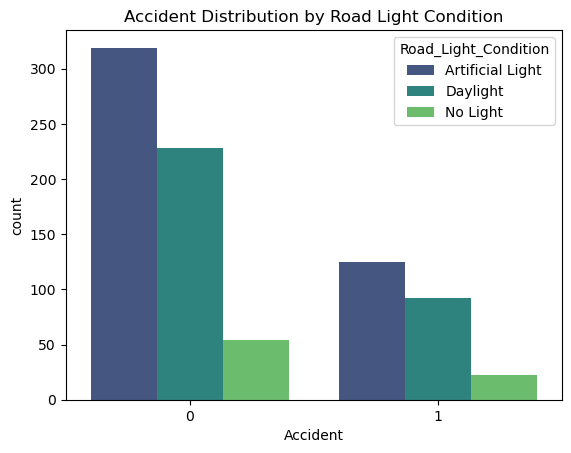

In [91]:
sns.countplot(data,
              x = 'Accident',
              hue = 'Road_Light_Condition',
              palette = 'viridis')
plt.title('Accident Distribution by Road Light Condition')
plt.show()

#### Mapping Accident Severity Levels to Numerical Values

In [92]:
severity_map = {'Low': 1, 'Moderate': 2, 'High': 3}
data['Accident_Severity'] = data['Accident_Severity'].map(severity_map)
data['Accident_Severity']

0      1
1      2
2      1
3      1
4      1
      ..
835    1
836    1
837    3
838    1
839    1
Name: Accident_Severity, Length: 840, dtype: int64

#### Mapping Time of Day to Numerical Values

In [93]:
time_of_day_map = {'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4}
data['Time_of_Day'] = data['Time_of_Day'].map(time_of_day_map)
data['Time_of_Day']

0      1
1      4
2      3
3      2
4      1
      ..
835    4
836    3
837    3
838    2
839    2
Name: Time_of_Day, Length: 840, dtype: int64

#### Mapping Road Light Condition to Numerical Values

In [94]:
light_map = {'No Light': 0, 'Daylight': 1, 'Artificial Light': 2}
data['Road_Light_Condition'] = data['Road_Light_Condition'].map(light_map)
data['Road_Light_Condition']

0      2
1      2
2      2
3      1
4      2
      ..
835    1
836    1
837    2
838    2
839    2
Name: Road_Light_Condition, Length: 840, dtype: int64

#### Checking the Last Categorical Columns

In [95]:
categorical_cols = data.select_dtypes(include = ['object'])
categorical_cols

,Weather,Road_Type,Road_Condition,Vehicle_Type
0,Rainy,City Road,Wet,Car
1,Clear,Rural Road,Wet,Truck
2,Rainy,Highway,Icy,Car
3,Clear,City Road,Under Construction,Bus
4,Rainy,Highway,Dry,Car
...,...,...,...,...
835,Clear,Highway,Dry,Car
836,Rainy,Rural Road,Dry,Motorcycle
837,Foggy,Highway,Dry,Car
838,Foggy,Highway,Dry,Car


#### Encoding Categorical Variables with One-Hot Encoding

In [96]:
data= pd.get_dummies(data, columns = ['Weather', 'Road_Type', 'Road_Condition', 'Vehicle_Type'], drop_first = True)

#### Converting the Values Bool to Int (True - False) --> (1 - 0)

In [97]:
data[data.select_dtypes('bool').columns] = data.select_dtypes('bool').astype(int)
data.head()

,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Driver_Age,Driver_Experience,Road_Light_Condition,Accident,...,Weather_Stormy,Road_Type_Highway,Road_Type_Mountain Road,Road_Type_Rural Road,Road_Condition_Icy,Road_Condition_Under Construction,Road_Condition_Wet,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_Truck
0,1,1.0,100.0,5.0,0.0,1,51.0,48.0,2,0,...,0,0,0,0,0,0,1,1,0,0
1,4,1.0,120.0,3.0,0.0,2,49.0,43.0,2,0,...,0,0,0,1,0,0,1,0,0,1
2,3,1.0,60.0,4.0,0.0,1,54.0,52.0,2,0,...,0,1,0,0,1,0,0,1,0,0
3,2,2.0,60.0,3.0,0.0,1,34.0,31.0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1.0,195.0,11.0,0.0,1,62.0,55.0,2,1,...,0,1,0,0,0,0,0,1,0,0


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Time_of_Day                        840 non-null    int64  
 1   Traffic_Density                    840 non-null    float64
 2   Speed_Limit                        840 non-null    float64
 3   Number_of_Vehicles                 840 non-null    float64
 4   Driver_Alcohol                     840 non-null    float64
 5   Accident_Severity                  840 non-null    int64  
 6   Driver_Age                         840 non-null    float64
 7   Driver_Experience                  840 non-null    float64
 8   Road_Light_Condition               840 non-null    int64  
 9   Accident                           840 non-null    int32  
 10  Weather_Foggy                      840 non-null    int32  
 11  Weather_Rainy                      840 non-null    int32  

In [99]:
data.corr()

,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Driver_Age,Driver_Experience,Road_Light_Condition,Accident,...,Weather_Stormy,Road_Type_Highway,Road_Type_Mountain Road,Road_Type_Rural Road,Road_Condition_Icy,Road_Condition_Under Construction,Road_Condition_Wet,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_Truck
Time_of_Day,1.000000,-0.004816,0.022150,0.066896,0.061598,0.048968,0.048375,0.058589,-0.011694,0.044464,...,0.017365,-0.005186,0.021310,0.012555,0.037113,-0.023896,-0.064115,-0.021456,-0.002643,-0.004683
Traffic_Density,-0.004816,1.000000,-0.040182,-0.033788,-0.028226,-0.040353,-0.015306,-0.008964,-0.030227,0.014318,...,-0.025471,-0.027169,0.025087,0.005534,0.010386,-0.023097,0.024859,-0.010212,-0.021571,0.001635
Speed_Limit,0.022150,-0.040182,1.000000,0.502788,-0.028024,-0.017267,-0.007341,0.006931,0.094092,-0.029362,...,0.070373,-0.035818,0.007653,-0.008751,0.067224,0.028333,-0.000209,-0.033706,0.002929,0.032624
Number_of_Vehicles,0.066896,-0.033788,0.502788,1.000000,-0.022613,0.022697,0.019017,0.018268,0.032821,0.044409,...,0.066948,-0.016335,0.040171,-0.006683,0.062951,-0.011724,-0.001200,-0.029013,0.020232,0.030191
Driver_Alcohol,0.061598,-0.028226,-0.028024,-0.022613,1.000000,0.015784,0.036844,0.034282,0.057279,0.019640,...,0.018972,0.011761,0.013221,0.032216,-0.003141,0.026481,-0.022387,-0.009656,-0.001301,0.010352
Accident_Severity,0.048968,-0.040353,-0.017267,0.022697,0.015784,1.000000,-0.047531,-0.054127,0.022583,-0.006084,...,0.076066,0.011178,-0.012321,-0.032240,0.022560,0.004488,-0.012475,-0.040488,0.000891,0.011025
Driver_Age,0.048375,-0.015306,-0.007341,0.019017,0.036844,-0.047531,1.000000,0.963391,-0.061233,0.036562,...,0.040619,-0.012135,-0.066698,0.013757,0.003654,0.075217,0.015956,0.000168,0.023087,-0.012162
Driver_Experience,0.058589,-0.008964,0.006931,0.018268,0.034282,-0.054127,0.963391,1.000000,-0.054541,0.027939,...,0.025578,-0.002040,-0.047618,0.007979,0.015789,0.087644,0.009801,0.008091,0.030510,-0.026955
Road_Light_Condition,-0.011694,-0.030227,0.094092,0.032821,0.057279,0.022583,-0.061233,-0.054541,1.000000,-0.006883,...,-0.013034,0.005422,0.000322,-0.019254,0.007218,-0.022662,0.051780,0.061356,-0.010072,-0.052942
Accident,0.044464,0.014318,-0.029362,0.044409,0.019640,-0.006084,0.036562,0.027939,-0.006883,1.000000,...,0.044840,-0.017594,-0.044886,0.055117,0.001250,-0.050017,-0.078837,-0.052088,0.004621,0.055908


#### Defining Independent X and Dependent Y Variables

In [100]:
X = data.drop('Accident', axis = 1)
y = data['Accident']

#### Splitting the Data into Training and Test Sets

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Hyperparameter Tuning with GridSearchCV for Four Models

In [110]:
param_grids = {
    'Decision Tree': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'n_neighbors': [3],
        'weights': ['distance'],
        'metric': ['euclidean']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

models = {
    'Decision Tree': DecisionTreeClassifier(random_state = 42),
    'Random Forest': RandomForestClassifier(random_state = 42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state = 42)
}

In [112]:
best_models = {}
results = {}

for name, model in models.items():
    grid_search = GridSearchCV(estimator = model,
                        param_grid = param_grids[name],
                        cv = 5,
                        scoring = 'accuracy',
                        n_jobs = -1)
    grid_search.fit(X_train, y_train)

    # Saving the best model
    best_models[name] = grid_search.best_estimator_

    # Testing performance 
    y_pred = grid_search.best_estimator_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f'Best parameters for {name}: {grid_search.best_params_}')
    print(f'Accuracy score for {name}: {accuracy}')
    print('--------------------------')

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Accuracy score for Decision Tree: 0.6845238095238095
--------------------------
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy score for Random Forest: 0.7142857142857143
--------------------------
Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy score for KNN: 0.6488095238095238
--------------------------
Best parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy score for SVM: 0.6964285714285714
--------------------------


#### Training Random Forest Model with Best Parameters

In [114]:
best_params_rf = {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

rf_best = RandomForestClassifier(**best_params_rf, random_state = 42)
rf_best.fit(X_train, y_train)

y_pred_rf = rf_best.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print('Accuracy Score of Random Forest with Best Parameters: ', rf_accuracy)

Accuracy Score of Random Forest with Best Parameters:  0.7142857142857143


#### Showing the Feature Importances Table for Random Forest

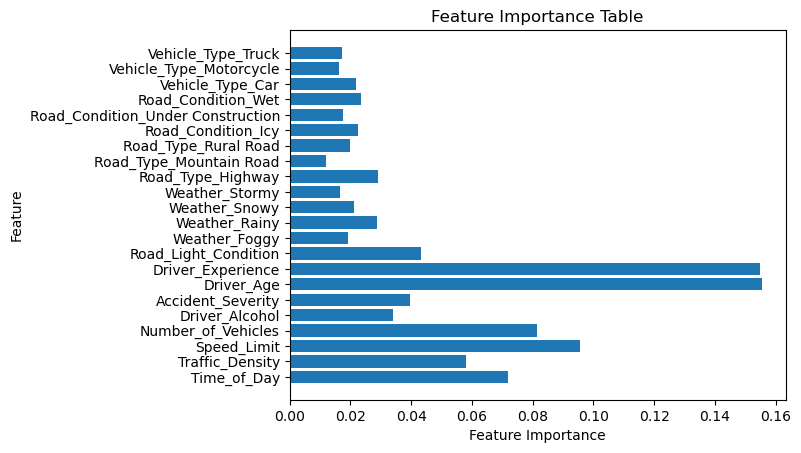

In [118]:
importances = rf_best.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Table')
plt.show()